# Self study 7

In this self study we start to investigate some community detection (graph clustering) techniques. As toy datasets we use the Lazega Law and the Zachary Karate club networks. Some of the following code was already used in self study 4.

In [1]:
import numpy as np
import networkx as nx
import scipy as sp
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.quality import modularity
import random

In [2]:
def get_att_array(G,att_name):
    ret_array=np.zeros(nx.number_of_nodes(G))
    for i,n in enumerate(G.nodes()):
        ret_array[i]=G.nodes[n][att_name]
    return(ret_array)

Remember that the edges in the Lazega network represent a directed 'friendship' relation, and that nodes have attributes Practice, Age, Seniority, Office, Gender and Status. For the purpose of this self study we turn the directed graph into an undirected one.

In the following you can see that already the 'Kamada Kawai' layout algorithm separates the nodes somewhat according tho the office location:

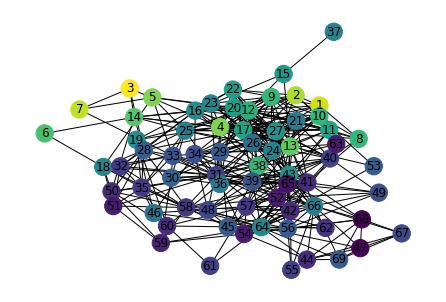

In [3]:
lazega=nx.readwrite.graphml.read_graphml('lazega.gml')
lazega=lazega.to_undirected()
nx.draw_kamada_kawai(lazega,with_labels=True,node_color=get_att_array(lazega,'Age'))

We next load the Zachary network. This is a built-in of networkx:

In [4]:
zachary = nx.karate_club_graph()

This does not contain the information on the two "ground truth" communities. This is here manually constructed:

In [5]:
zachary_gt=np.array([0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1])
zachary_gtc = [set(),set()]
for i in range(len(zachary_gt)):
    if zachary_gt[i] == 0:
        zachary_gtc[0] = zachary_gtc[0].union(set([i]))
    else:
        zachary_gtc[1] = zachary_gtc[1].union(set([i]))


In [6]:
print(zachary_gtc)

[{0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


Using a generic drawing method, we obtain a layout that separates the two ground truth communities quite well:

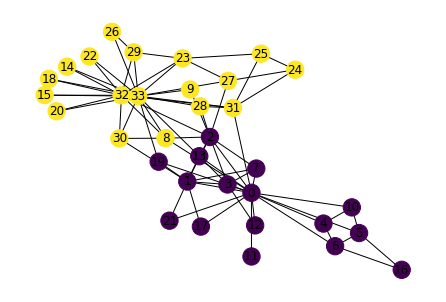

In [7]:
nx.draw(zachary,with_labels=True,node_color=zachary_gt)

In [12]:
def make_partition(arr):
    result = {}
    for i in range(len(arr)):
        v = arr[i]
        if v in result.keys():
            result[v].append(str(i+ 1))
        else:
            result[v] = [str(i+ 1)]
    return [set(j) for j in result.values()]

**Task 1:** Use the networkx implementations of the Kernighan-Lin and Newman-Girvan algorithms to divide the Lazega and Zachary networks into 2,3,4 communities. Compare the communities returned by the algorithms with ground truth clusters in the network: the ground truth communities in Zachary, and the clusters defined by node attributes Office, Gender, Practice, Status in Lazega.

In [23]:
a = get_att_array(lazega, 'Age')
print(a)
b = make_partition(a)
print(b)

[64. 62. 59. 53. 50. 46. 49. 41. 67. 53. 50. 52. 56. 46. 43. 45. 47. 38.
 59. 63. 45. 43. 44. 53. 57. 36. 53. 48. 49. 31. 47. 29. 55. 38. 31. 44.
 33. 37. 34. 34. 37. 33. 29. 33. 42. 31. 43. 33. 39. 31. 29. 38. 35. 36.
 45. 38. 34. 28. 32. 30. 38. 34. 29. 43. 38. 31. 26. 26. 35.]
[{'1'}, {'2'}, {'19', '3'}, {'24', '27', '4', '10'}, {'5', '11'}, {'14', '6'}, {'29', '7'}, {'8'}, {'9'}, {'12'}, {'13'}, {'47', '64', '15', '22'}, {'55', '21', '16'}, {'17', '31'}, {'61', '52', '65', '18', '34', '56'}, {'20'}, {'23', '36'}, {'25'}, {'54', '26'}, {'28'}, {'66', '50', '35', '46', '30'}, {'32', '51', '43', '63'}, {'33'}, {'42', '48', '44', '37'}, {'38', '41'}, {'40', '57', '62', '39'}, {'45'}, {'49'}, {'53', '69'}, {'58'}, {'59'}, {'60'}, {'68', '67'}]


[{'66', '57', '52', '63', '60', '19', '51', '54', '32', '69', '67', '47', '59', '41', '6', '62', '46', '56', '28', '45', '61', '64', '50', '18', '49', '35', '68', '44', '65', '33', '42', '58', '31', '55'}, {'3', '43', '17', '1', '5', '4', '37', '40', '8', '53', '26', '48', '30', '9', '25', '39', '24', '21', '13', '10', '27', '2', '36', '22', '38', '16', '15', '29', '20', '12', '34', '23', '7', '14', '11'}]
Similarity with attribute Office
Cosine sim = 0.6524986798170382
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.30479393973655944
Difference: -0.2853750918650008
Similarity with attribute Gender
Cosine sim = 0.648074069840786
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.30479393973655944
Difference: -0.32564808009999935
Similarity with attribute Practice
Cosine sim = 0.6631316534019392
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.30479393973655944
Difference: -0.3137009189640768
Similarity with attribute St

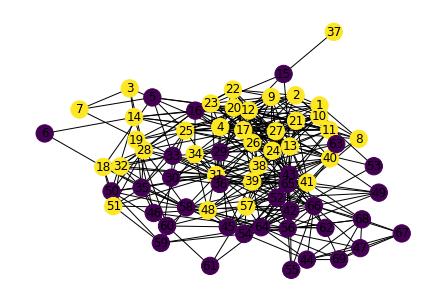

In [21]:
### Lazega 2 clusters with kernighen lin
R = list(kernighan_lin_bisection(lazega))

print(R)
clusters = [1 if str(i) in R[1] else 0 for i in range(1, 70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')


Similarity with attribute Office
Cosine sim = 0.6462561866810479
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.3116029421925741
Difference: -0.2921840943210155

Similarity with attribute Gender
Cosine sim = 0.6237929520753048
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.3116029421925741
Difference: -0.332457082556014

Similarity with attribute Practice
Cosine sim = 0.6426284637199842
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.3116029421925741
Difference: -0.3205099214200915

Similarity with attribute Status
Cosine sim = 0.728039845617479
Modularity ground truth: 0.1739185055370255
Modularity clustering: 0.3116029421925741
Difference: -0.1376844366555486



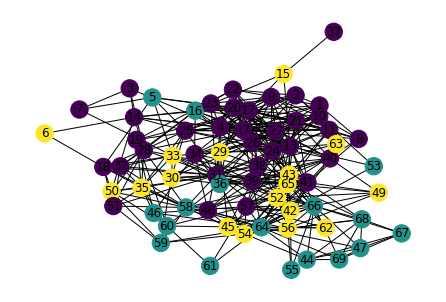

In [22]:
### Lazega 3 clusters with kernighen lin
R = list(kernighan_lin_bisection(lazega))

j = random.randint(0,1)
sub_g = lazega.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))
clusters = [0 if str(i) in R[0] else 1 if str(i) in R[1] else 2 for i in range(1,70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}\n')

Similarity with attribute Office
Cosine sim = 0.6329692363544859
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.28331166261518453
Difference: -0.2638928147436259

Similarity with attribute Gender
Cosine sim = 0.6084869844593311
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.28331166261518453
Difference: -0.30416580297862444

Similarity with attribute Practice
Cosine sim = 0.5828329778580614
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.28331166261518453
Difference: -0.29221864184270196

Similarity with attribute Status
Cosine sim = 0.5345653124362573
Modularity ground truth: 0.1739185055370255
Modularity clustering: 0.28331166261518453
Difference: -0.10939315707815903



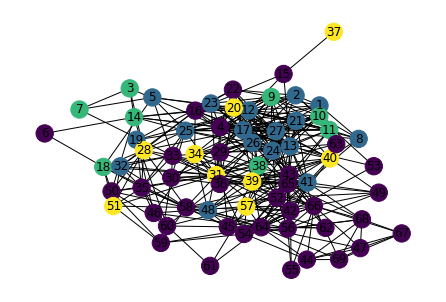

In [26]:
### Lazega 4 clusters with kernighen lin
R = list(kernighan_lin_bisection(lazega))

j = random.randint(0,1)
sub_g = lazega.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))

j = random.randint(0,2)
sub_g = lazega.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))

clusters = [0 if str(i) in R[0] else 1 if str(i) in R[1] else 2 if str(i) in R[2] else 3 for i in range(1,70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}\n')

Cosine sim = 0.05716619504750295
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.3717948717948718
Difference: -0.00032873109796183186


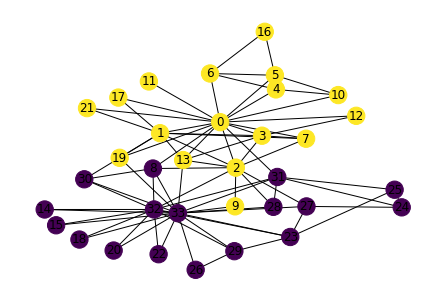

In [83]:
### Zachary 2 clusters kernighan lin
R = kernighan_lin_bisection(zachary)
clusters = [1 if i in R[1] else 0 for i in range(34)]
nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)


comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

Cosine sim = 0.923869770874312
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.3747534516765286
Difference: -0.0032873109796186517


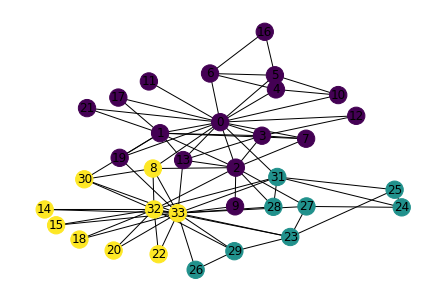

In [88]:
### Zachary 3 clusters kernighan lin
R = list(kernighan_lin_bisection(zachary))



j = random.randint(0,1)
sub_g = zachary.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))
clusters = [0 if i in R[0] else 1 if i in R[1] else 2 for i in range(34)]

nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)

comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

Cosine sim = 0.23473427987697595
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.37056213017751477
Difference: 0.0009040105193952042


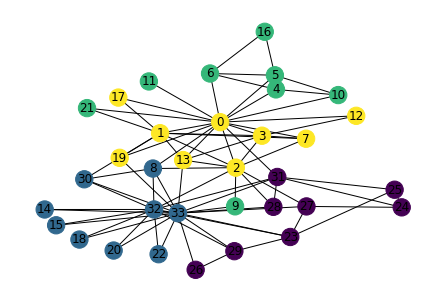

In [93]:
### Zachary 4 clusters kernighan lin
R = list(kernighan_lin_bisection(zachary))

j = random.randint(0,1)
sub_g = zachary.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))

j = random.randint(0,2)
sub_g = zachary.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))

clusters = [0 if i in R[0] else 1 if i in R[1] else 2 if i in R[2] else 3 for i in range(34)]

nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)

comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

**Task 2:** (a bit more involved; consider this as optional): construct a networkx graph out of the web-pages you have crawled in self study 1: each crawled page is a node, and edges are defined by hyperlinks. These are directed edges, but we can also make them undirected for community detection. Apply the Kernighan-Lin and Newman-Girvan algorithms to your crawled web data. Do you see a correspondence between the communities that are returned, and what you know about the pages (urls, content, ...)? 